# Shashank Garg  IBM Data Science Capstone Project Notebook

## The objective of this project to predict data collision based on historical collision data is provided via CSV file.

## STEP 1 -> The following code load CSV files for Data Collision and Add new column(Weekday) to indicate if collision occurs on weekday or weekend.

In [37]:
#This is IBM Data Science Capstone Project Notebook
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_13f87501450b48f5a7f16910f41da947 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qgYtlvDY_lzs_xPzfgS7wat_gAgaVROhyIriai2FJ44_',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_13f87501450b48f5a7f16910f41da947.get_object(Bucket='ibmdatascience-donotdelete-pr-f5nystuqcywlmj',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

#Add weekday column to indicate, if incident day
df['WEEKDAY'] = ((pd.DatetimeIndex(df.INCDATE).dayofweek) <5).astype(float)

#Display header of Data Collision CSV file.
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,WEEKDAY
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,1.0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,1.0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,1.0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,1.0
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,1.0


## Looking into data the hypothesis is that weather and road/light condition are bigh factors for vehicle collision and therefore now on, i will prepare data and apply prediction model using these data fields.

## STEP 2 --> Prepare Data for further analysis includes add data categories for weather, road condition and light condition 

## I also looked into columns such as Under Influence and INATTENTION, however, their data was not complete and thefore ruled those columns out for prediction model.       

### The following code add numeric categories for weather, road and light condition fields



In [38]:
#We must use label encoding to covert the features to our desired data type.
df["WEATHER"] = df["WEATHER"].astype('category')
df["ROADCOND"] = df["ROADCOND"].astype('category')
df["LIGHTCOND"] = df["LIGHTCOND"].astype('category')


df["WEATHER_CD"] = df["WEATHER"].cat.codes
df["ROADCOND_CD"] = df["ROADCOND"].cat.codes
df["LIGHTCOND_CD"] = df["LIGHTCOND"].cat.codes

df["WEATHER_CD"] = df["WEATHER_CD"].astype('int64')
df["ROADCOND_CD"] = df["ROADCOND_CD"].astype('int64')
df["LIGHTCOND_CD"] = df["LIGHTCOND_CD"].astype('int64')

df.dtypes



SEVERITYCODE         int64
X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE.1       int64
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE         int64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER           category
ROADCOND          category
LIGHTCOND         category
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
H

## The following code reindex dataframe to display newly added categories and create sample data for prediction model

In [39]:
new_index=['SEVERITYCODE','WEEKDAY','WEATHER _CD','ROADCOND_CD','LIGHTCOND_CD']
df.reindex(new_index)
df[['SEVERITYCODE','WEEKDAY','WEATHER_CD','ROADCOND_CD','LIGHTCOND_CD']].head(11)

,SEVERITYCODE,WEEKDAY,WEATHER_CD,ROADCOND_CD,LIGHTCOND_CD
0,2,1.0,4,8,5
1,1,1.0,6,8,2
2,1,1.0,4,0,5
3,1,1.0,1,0,5
4,2,1.0,6,8,5
5,1,0.0,1,0,5
6,1,1.0,6,8,5
7,2,1.0,1,0,5
8,1,1.0,1,0,5
9,2,1.0,1,0,5


In [40]:
#Create Sample data to Balancing the Dataset

sampledata=df[['SEVERITYCODE','WEEKDAY','WEATHER_CD','ROADCOND_CD','LIGHTCOND_CD']]

balancedata= sampledata.sample(frac=0.5, replace=True, random_state=1)

balancedata.head()

,SEVERITYCODE,WEEKDAY,WEATHER_CD,ROADCOND_CD,LIGHTCOND_CD
128037,2,1.0,1,0,6
5192,1,1.0,10,7,8
50057,1,1.0,4,8,5
109259,2,1.0,1,0,5
73349,2,0.0,1,0,5


In [41]:
#check correleation amoung various data categories 
balancedata[['SEVERITYCODE','WEEKDAY','WEATHER_CD','ROADCOND_CD','LIGHTCOND_CD']].corr()

,SEVERITYCODE,WEEKDAY,WEATHER_CD,ROADCOND_CD,LIGHTCOND_CD
SEVERITYCODE,1.000000,0.006784,-0.098802,-0.040247,-0.040960
WEEKDAY,0.006784,1.000000,-0.015088,-0.014827,0.082862
WEATHER_CD,-0.098802,-0.015088,1.000000,0.753736,0.284944
ROADCOND_CD,-0.040247,-0.014827,0.753736,1.000000,0.095357
LIGHTCOND_CD,-0.040960,0.082862,0.284944,0.095357,1.000000


In [42]:
#Create X data set to apply ML prediction model 
X=np.asarray(balancedata[['WEATHER_CD','ROADCOND_CD','LIGHTCOND_CD']])
X[0:5]

array([[ 1,  0,  6],
       [10,  7,  8],
       [ 4,  8,  5],
       [ 1,  0,  5],
       [ 1,  0,  5]])

In [43]:
#Create Y data set to apply ML prediction model
y=np.asarray(balancedata['SEVERITYCODE'])
y[0:5]

array([2, 1, 1, 2, 2])

## Apply Decision ML Model to predict collision 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [45]:
#Train and Split Data Set
#We will use 30% of our data for testing and 70% for training.
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print ('Train Set:',X_trainset.shape,y_trainset.shape)
print ('Train Set:',X_testset.shape,y_testset.shape)


Train Set: (68135, 3) (68135,)
Train Set: (29201, 3) (29201,)


In [46]:
sevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
sevTree # it shows the default parameters
sevTree.fit(X_trainset,y_trainset)
predTree = sevTree.predict(X_testset)
print(predTree[0:3])

[1 1 1]


In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7010376356974076


## Apply K-NN Model to Predict Collision 

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
k = 20
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [50]:
yhat = neigh.predict(X_testset)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [51]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhat))

Train set Accuracy:  0.7002421662875175
Test set Accuracy:  0.7009691448922982


In [52]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(15,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.70059245,
       0.70100339, 0.69203109, 0.69237355, 0.69247629, 0.70096914,
       0.6923393 , 0.70096914, 0.70096914, 0.70096914])

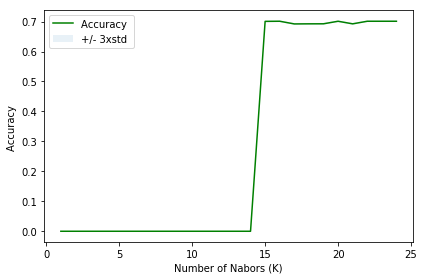

In [53]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [54]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7010033902948529 with k= 16


## Evaluate KNN Accuracey using F1 Score and Jaccard Score

In [55]:
from sklearn.metrics import f1_score
f1_score(y_testset, yhat, average='weighted') 

0.5777667966960074

In [56]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_testset, yhat)

0.7009691448922982

## Apply Logistic Regression Model to predict data collision 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
yhatR = LR.predict(X_testset)
yhatR

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
yhat_prob = LR.predict_proba(X_testset)
yhat_prob

array([[0.87452469, 0.12547531],
       [0.6685821 , 0.3314179 ],
       [0.6755442 , 0.3244558 ],
       ...,
       [0.6755442 , 0.3244558 ],
       [0.83352318, 0.16647682],
       [0.61146267, 0.38853733]])

## Evaluate Logistic Regression Accurecy using F1, Jaccardand Log Loss score

In [60]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_testset, yhatR)

0.7010033902948529

In [63]:
from sklearn.metrics import f1_score
f1_score(y_testset, yhatR, average='weighted') 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5777833906841271

In [62]:
from sklearn.metrics import log_loss
log_loss(y_testset, yhat_prob)

0.6046075375471303

### Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. And based on these indexes for all model between 50 to 70%, we can conclude following outcome.

# Based on historical data from data collision pointing to certain fields such as weather, road condition and Light condition, we can conclude that particular weather,light and road conditions have a somewhat impact on collision